### Gọi thư viện cần thiết 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from statsmodels.stats.descriptivestats import describe

### Chuẩn bị data cho ARMA model ( tất cả dữ liệu được lấy ở investing.com)

##### Dữ liệu Log Return của 10 cổ phiếu

In [2]:
data = pd.read_csv("log_return_dcc.csv")

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [4]:
df_sorted = data.sort_index()

In [63]:
describe(df_sorted)

,DIG_Price,HCM_Price,HPG_Price,MBB_Price,MWG_Price,PVD_Price,SBT_Price,VCG_Price,VNM_Price,VOS_Price
nobs,102.000000,102.000000,102.000000,1.020000e+02,1.020000e+02,102.000000,1.020000e+02,102.000000,102.000000,102.000000
missing,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
mean,1.807687,1.523842,2.066036,1.730288e+00,2.016906e+00,0.641363,-1.581384e-01,1.225062,0.366292,1.885086
std_err,1.619967,1.347095,1.093296,9.059858e-01,1.137298e+00,1.406632,1.082259e+00,1.195084,0.658325,1.960987
upper_ci,4.982764,4.164099,4.208857,3.505988e+00,4.245969e+00,3.398311,1.963051e+00,3.567385,1.656585,5.728551
lower_ci,-1.367390,-1.116416,-0.076784,-4.541127e-02,-2.121560e-01,-2.115585,-2.279328e+00,-1.117260,-0.924002,-1.958379
std,16.360865,13.604992,11.041748,9.150008e+00,1.148614e+01,14.206288,1.093028e+01,12.069760,6.648758,19.805002
iqr,16.257822,17.203789,14.937951,8.887898e+00,9.992586e+00,16.522002,9.446455e+00,10.801760,8.027622,17.209402
iqr_normal,12.051941,12.753188,11.073520,6.588609e+00,7.407515e+00,12.247778,7.002668e+00,8.007356,5.950885,12.757349
mad,11.914978,10.596198,8.737570,6.585480e+00,7.373502e+00,10.608637,7.649154e+00,8.375683,5.079918,14.175796


<Axes: xlabel='Date'>

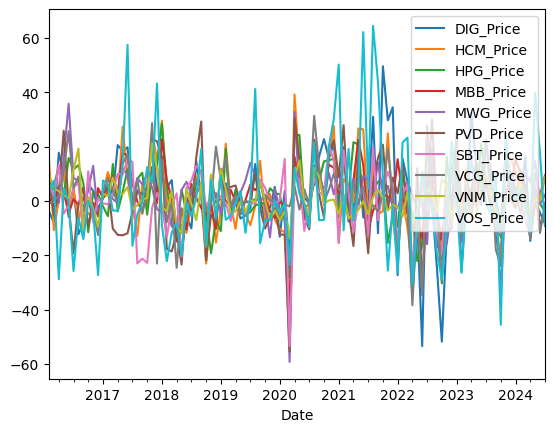

In [5]:
df_sorted.plot()

##### Dữ liệu giá đóng cửa của 10 cổ phiếu

In [6]:
data1 = pd.read_csv("data_full.csv")

In [7]:
data1['Date'] = pd.to_datetime(data1['Date'])
data1.set_index('Date', inplace=True)

In [8]:
df_sorted1 = data1.sort_index()

In [64]:
describe(df_sorted1)

,DIG_Price,HCM_Price,HPG_Price,MBB_Price,MWG_Price,PVD_Price,SBT_Price,VCG_Price,VNM_Price,VOS_Price
nobs,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000,1.060000e+02,106.000000,106.000000,106.000000
missing,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
mean,1.757715e+04,14764.874528,16535.083019,12561.923585,37931.094340,16561.653774,1.566122e+04,17136.518868,78082.047170,6653.867925
std_err,1.496555e+03,717.205166,911.840783,618.879716,1677.275221,636.758179,3.210064e+02,721.039459,1189.639429,636.753948
upper_ci,2.051034e+04,16170.570824,18322.258112,13774.905539,41218.493365,17809.676871,1.629038e+04,18549.730239,80413.697606,7901.882729
lower_ci,1.464396e+04,13359.178233,14747.907925,11348.941631,34643.695314,15313.630676,1.503206e+04,15723.307497,75750.396734,5405.853120
std,1.540797e+04,7384.079127,9387.975445,6371.756657,17268.605320,6555.826698,3.304963e+03,7423.555585,12248.087566,6555.783135
iqr,1.613138e+04,10284.725000,14923.975000,10473.050000,24172.500000,9083.275000,4.617275e+03,9938.750000,16009.000000,10122.500000
iqr_normal,1.195821e+04,7624.078051,11063.159222,7763.683582,17919.101063,6733.441833,3.422791e+03,7367.606400,11867.489458,7503.820478
mad,1.113320e+04,6110.944268,8153.912852,5624.195069,14189.935208,5350.880028,2.467759e+03,5800.381274,9638.466714,5803.988964


<Axes: xlabel='Date'>

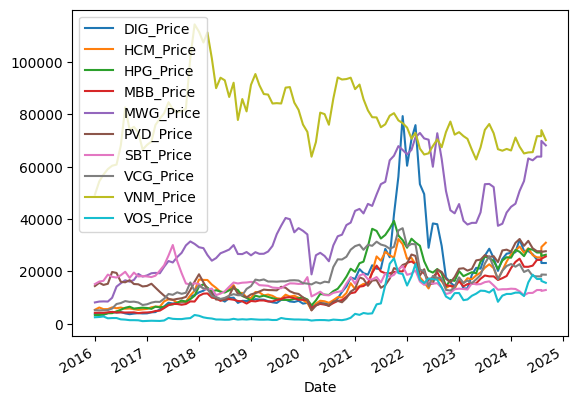

In [9]:
df_sorted1.plot()

### Dự đoán "return" bằng ARMA model

In [10]:
from arch import arch_model
from pmdarima import auto_arima
import statsmodels.api as sm

In [11]:
rt = []
for i in range (0,10):
    auto_model = auto_arima(df_sorted.iloc[0:-1, i], seasonal=True, m = 1)

    order = auto_model.order

    model_arima = sm.tsa.arima.ARIMA(df_sorted.iloc[0:-1, i], order = order)

    res_arima = model_arima.fit()
    rt.append(res_arima.forecast(steps=2))

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\Local

### Xây dựng danh mục đầu tư bằng phương pháp: Tối ưu hóa Sharpe Ratio 

In [12]:
from scipy.optimize import minimize

In [13]:
def optimize_sharpe_ratio(mu, Sigma, P, T, rf=0):
    """
    Hàm tối ưu hóa Sharpe Ratio và trả về số lượng cổ phiếu tối ưu và giá trị Sharpe Ratio.
    
    Parameters:
    - mu: Lợi nhuận kỳ vọng của từng cổ phiếu (arma model)
    - Sigma: Ma trận covariance (DCC-GARCh)
    - P: Giá đóng cửa của cổ phiếu tại ngày mua 01-08-2024
    - T: Tổng số tiền đầu tư (10.000.000.000)
    - rf: Lãi suất phi rủi ro quy ước là 0

    Returns:
    - Số cổ phiếu tối ưu để tối đa hóa Sharpe Ratio
    """
    
    N = len(mu)  

    
    def neg_sharpe_ratio(S):
        w = 100 * S * P / T
        mu_p = np.dot(mu, w)  
        sigma_p = np.dot(w.T, np.dot(Sigma, w))  
        if sigma_p == 0:
            return np.inf  
        sharpe_ratio = (mu_p - rf) / np.sqrt(sigma_p)  
        return -sharpe_ratio  

    
    def constraint_sum_weights(S):
        w = 100 * S * P / T
        return 1 - np.sum(w)

   
    bounds = [(0, 1000)] * N

    
    S0 = np.array([int((T/1000)/p) for p in P])


    
    constraints = [{'type': 'eq', 'fun': constraint_sum_weights}]

   
    solution = minimize(neg_sharpe_ratio, S0, method='SLSQP', bounds=bounds, constraints=constraints)


    S_optimal = np.round(solution.x / 100) * 100

    return S_optimal

#### Kết quả dự đoán được rt từ mô hình ARMA

In [14]:
mu = np.array([1.907164,1.571579,2.125739,1.512421,2.014902,0.686266,-0.247954,1.245358,0.28175,1.994948])

#### Kết quả của covariance matrix được dự đoán từ mô hình DCC-GARCH (bằng ngôn ngữ R)

In [15]:
Sigma = np.array([
[154.29431 ,107.17121 , 58.95926 , 168.5991 , 65.14940  ,73.77471 , 62.92315 , 89.52022 , 20.68642 , 134.62953],
[107.17121 ,212.46532 , 98.88097  ,280.7461 ,105.95077 , 92.60458 , 74.77739 ,104.55472 , 32.97493  ,163.03210],
[58.95926 , 98.88097, 136.87796,  179.2768 , 94.12915 ,56.62076 , 41.98961 , 59.88359 , 18.45662  , 80.72431],
[168.59909 ,280.74607 ,179.27682 , 821.4961 ,216.42998 ,159.63076, 137.34074 ,142.15945 , 56.68680 , 205.91800],
[65.14940, 105.95077 , 94.12915 , 216.4300, 315.31886,  91.48077,  64.61391, 106.39276,  34.53871 , 222.73912],
[73.77471  ,92.60458 , 56.62076 , 159.6308 , 91.48077 ,133.58425 , 50.93916 , 62.77233 , 22.53460 , 157.27212],
[62.92315 , 74.77739 , 41.98961 , 137.3407 , 64.61391 , 50.93916, 117.87414 , 42.28601 , 20.42723 , 117.80841],
[89.52022, 104.55472 , 59.88359 , 142.1595, 106.39276  ,62.77233 , 42.28601, 196.91004  ,26.17537 , 112.29890],
[20.68642 , 32.97493  ,18.45662  , 56.6868,  34.53871 , 22.53460,  20.42723 , 26.17537 , 29.11709 ,  43.83351],
[134.62953 ,163.03210 , 80.72431 , 205.9180 ,222.73912 ,157.27212 ,117.80841 ,112.29890 , 43.83351, 1159.95414]])

#### Giá của từng cổ phiếu tại ngày mua 01-08-2024

In [16]:
P = np.array([23350,	24250,	26700,	23400,	62100,	27850,	12500,	17700,	70300,	15950])

#### Tổng vốn 10.000.000.000

In [17]:
T = 10000000000

#### Tối ưu hóa bằng phương pháp đã xây dựng và data đã chuẩn bị

In [18]:
S_optimal = optimize_sharpe_ratio(mu, Sigma, P, T)

#### Optimal weight

In [19]:
S_optimal

array([400., 400., 400., 400., 200., 400., 800., 600., 100., 600.])

### Một số so sánh và đo lường hiệu suất của danh mục đầu tư

##### Data theo ngày trong tháng 8 của từng cổ phiếu 

In [20]:
data_test = pd.read_csv("1month9.csv")

#### Data theo ngày trong tháng 8 của VN30-index

In [21]:
Vn30 = pd.read_csv("VN 30 Historical Data.csv")

#### Data theo ngày trong tháng 8 của VN-index

In [22]:
Vnind = pd.read_csv("VN Index Historical Data.csv")

#### Một số chuẩn hóa dữ liệu 

In [23]:
data_test['Date'] = pd.to_datetime(data_test['Date'])
data_test.set_index('Date', inplace=True) 

In [24]:
Vn30['Date'] = pd.to_datetime(Vn30['Date'])
Vn30.set_index('Date', inplace=True)

In [25]:
Vnind['Date'] = pd.to_datetime(Vnind['Date'])
Vnind.set_index('Date', inplace=True)

In [26]:
data_test = data_test.sort_index()

In [27]:
Vn30 = Vn30.sort_index()

In [28]:
Vnind = Vnind.sort_index()

In [29]:
data_test.head(1)

,Price_DIG,Price_HCM,Price_HPG,Price_MBB,Price_MWG,Price_PVD,Price_SBT,Price_VCG,Price_VNM,Price_VOS
Date,,,,,,,,,,
2024-08-01,23350.0,24250.0,26700.0,23400.0,62100.0,27850.0,12500.0,17700.0,70300.0,15950.0


In [30]:
describe(data_test)

,Price_DIG,Price_HCM,Price_HPG,Price_MBB,Price_MWG,Price_PVD,Price_SBT,Price_VCG,Price_VNM,Price_VOS
nobs,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,23571.739130,26765.217391,25882.173913,23969.130435,66591.739130,27132.608696,12726.086957,18432.608696,73394.347826,16384.782609
std_err,205.406809,433.006253,94.029170,126.088796,699.266881,130.429842,45.539103,178.918819,327.857355,148.425025
upper_ci,23974.329079,27613.894052,26066.467700,24216.259935,67962.277033,27388.246488,12815.341959,18783.283136,74036.936434,16675.690312
lower_ci,23169.149182,25916.540731,25697.880127,23722.000935,65221.201228,26876.970903,12636.831954,18081.934255,72751.759219,16093.874906
std,985.096452,2076.625036,450.948057,604.700625,3353.566151,625.519547,218.397867,858.064510,1572.348637,711.821413
iqr,1450.000000,3950.000000,450.000000,1030.000000,6945.000000,975.000000,200.000000,1125.000000,1250.000000,1000.000000
iqr_normal,1074.886608,2928.139382,333.585499,763.540143,5148.336204,722.768582,148.260222,833.963748,926.626387,741.301109
mad,822.684310,1810.207940,311.153119,528.733459,2996.294896,550.094518,159.924386,683.553875,1120.415879,589.792060


<Axes: xlabel='Date'>

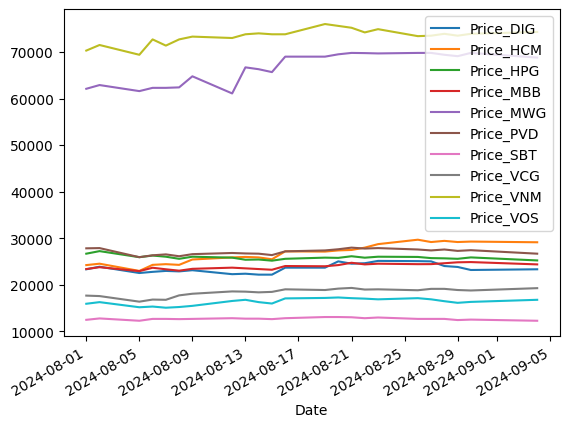

In [31]:
data_test.plot()

In [32]:
Vn30.head(2)

,Price
Date,
2024-08-01,1272.00
2024-08-02,1281.01


In [61]:
describe(Vn30)

,Price
nobs,23.000000
missing,0.000000
mean,1289.966087
std_err,6.405538
upper_ci,1302.520710
lower_ci,1277.411464
std,30.719880
iqr,51.565000
iqr_normal,38.225192
mad,27.313648


<Axes: xlabel='Date'>

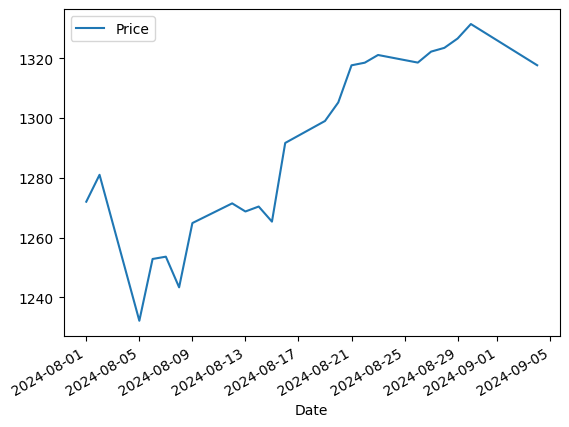

In [33]:
Vn30.plot()

In [34]:
Vnind.head(2)

,Price
Date,
2024-08-01,1226.96
2024-08-02,1236.60


In [62]:
describe(Vnind)

,Price
nobs,23.000000
missing,0.000000
mean,1249.829565
std_err,6.493040
upper_ci,1262.555689
lower_ci,1237.103441
std,31.139525
iqr,55.700000
iqr_normal,41.290472
mad,28.152628


<Axes: xlabel='Date'>

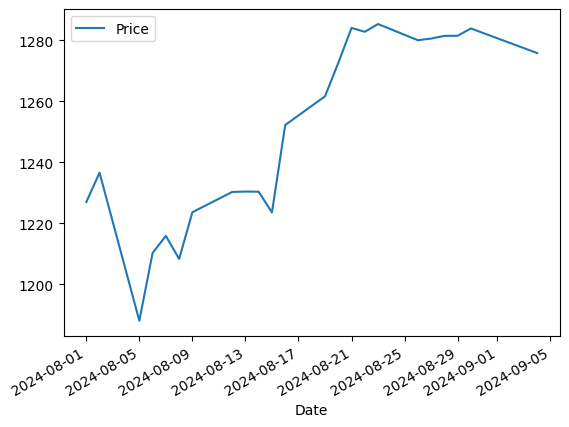

In [35]:
Vnind.plot()

### Tính return

In [36]:
rest = data_test.pct_change().dropna()
rest = rest*100

In [37]:
rest30 = Vn30.pct_change().dropna()
rest30 = rest30*100

In [38]:
restind = Vnind.pct_change().dropna()
restind = restind*100

In [39]:
rest.head(1)

,Price_DIG,Price_HCM,Price_HPG,Price_MBB,Price_MWG,Price_PVD,Price_SBT,Price_VCG,Price_VNM,Price_VOS
Date,,,,,,,,,,
2024-08-02,2.35546,1.237113,2.059925,1.709402,1.288245,0.179533,2.4,-0.564972,1.70697,2.194357


<Axes: xlabel='Date'>

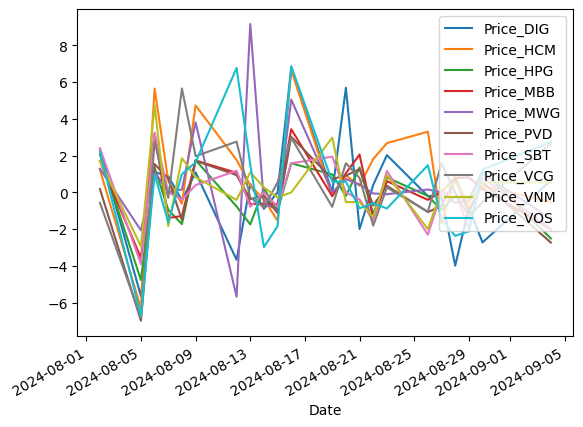

In [40]:
rest.plot()

In [41]:
rest30.head(1)

,Price
Date,
2024-08-02,0.708333


<Axes: xlabel='Date'>

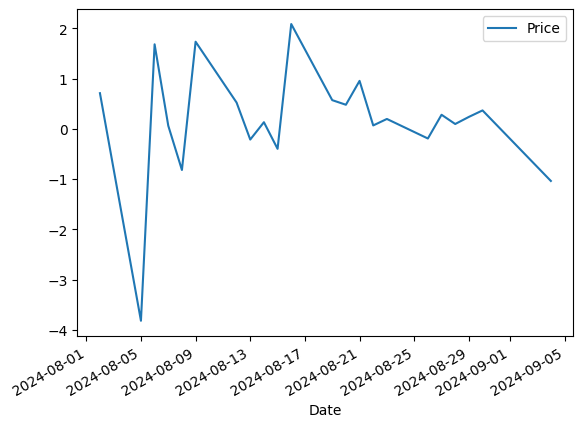

In [42]:
rest30.plot()

In [43]:
restind.head(1)

,Price
Date,
2024-08-02,0.785682


<Axes: xlabel='Date'>

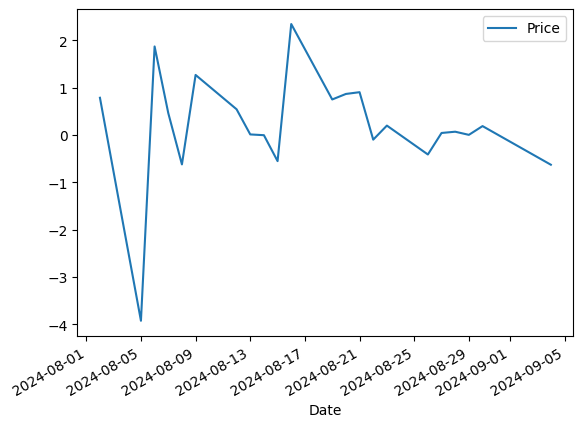

In [44]:
restind.plot()

#### Số tiền còn dư lại trong tài khoản sau khi mua xong port (đơn vị: triệu)

In [45]:
resid = (T - np.dot(S_optimal*100,P))/1000000
resid

14.0

#### Giá ngày chốt của port 01-09-2024

In [46]:
P_sell = data_test.iloc[-1]
P_sell

Price_DIG    23350.0
Price_HCM    29150.0
Price_HPG    25250.0
Price_MBB    24400.0
Price_MWG    68800.0
Price_PVD    26700.0
Price_SBT    12300.0
Price_VCG    19300.0
Price_VNM    74300.0
Price_VOS    16800.0
Name: 2024-09-04 00:00:00, dtype: float64

#### Lời lỗ của port (đơn vị: triệu)

In [47]:
(np.dot(S_optimal*100, P_sell) - T)/1000000 + resid

437.0

#### Vẽ hình biến động của port theo giá trị với đường màu đỏ là vốn

In [48]:
value_port = data_test.dot(S_optimal*100)

<Axes: xlabel='Date'>

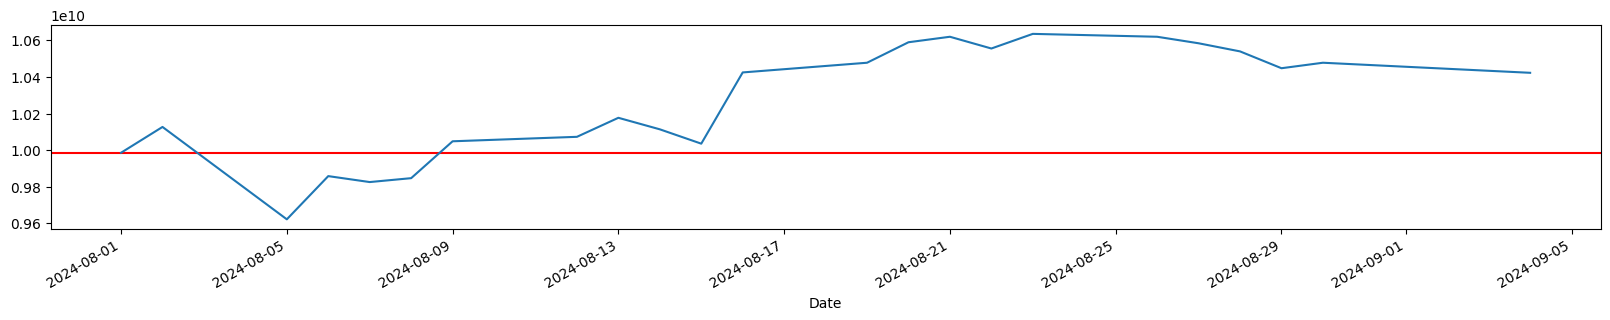

In [49]:
plt.figure(figsize=(20, 3))
y_value = 1.000000e+10 - resid*1000000
plt.axhline(y=y_value, color='red')
value_port.plot()

#### Lợi nhuận sau 1 tháng giữ port (%)

In [50]:
(((np.dot(S_optimal*100,P_sell)) - T) + resid*1000000)*100/T

4.37

#### So sánh biến động của portfolio với 2 chỉ số chính là VN30 và VN-index

In [51]:
shares_bought = S_optimal*100  
initial_prices = P
returns_data = rest  
portfolio_values = returns_data.dot(shares_bought) / np.sum(shares_bought)

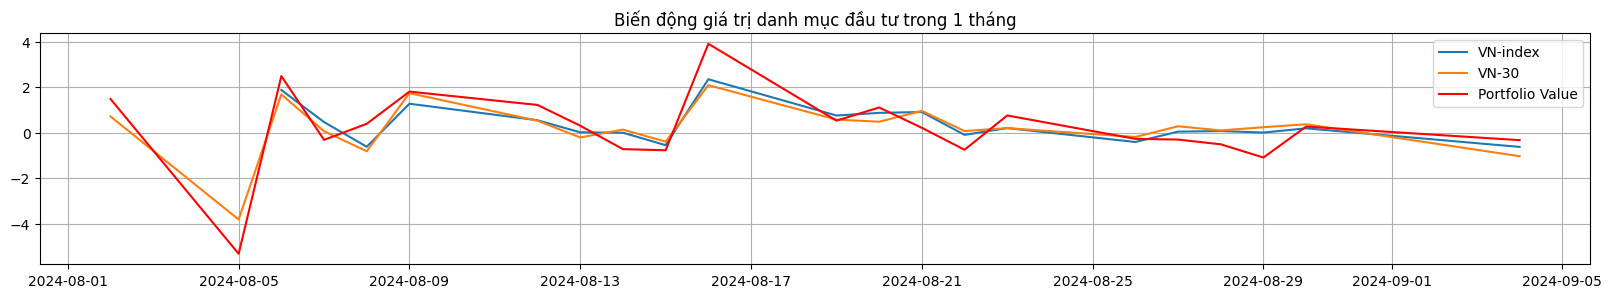

In [52]:
plt.figure(figsize=(20, 3))
plt.plot(restind[2:] , label='VN-index')
plt.plot(rest30, label='VN-30')
plt.plot(portfolio_values, label='Portfolio Value', color ="red")
plt.title('Biến động giá trị danh mục đầu tư trong 1 tháng')
plt.grid(True)
plt.legend()
plt.show()

#### Tính Sharpe Ratio

In [53]:
mean_portfolio_return = portfolio_values.mean()
std_portfolio_return = portfolio_values.std()
sharpe_ratio = (mean_portfolio_return) / std_portfolio_return

In [54]:
sharpe_ratio

0.1059202921724355

#### Tính Sortino Ratio

In [55]:
downside_returns = portfolio_values[portfolio_values < 0]  
downside_std = downside_returns.std()
sortino_ratio = (mean_portfolio_return) / downside_std

In [56]:
sortino_ratio

0.11894851929402825

#### Tính Treynor Ratio

In [57]:
cov_matrix = np.cov(portfolio_values.values, np.squeeze(restind.values))
beta_portfolio = cov_matrix[0, 1] / np.var(restind)
treynor_ratio = (mean_portfolio_return) / beta_portfolio

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [58]:
treynor_ratio

Price    0.128939
dtype: float64

#### Tính Max Drawdown

In [59]:
portfolio_values = pd.Series(portfolio_values)
roll_max = portfolio_values.cummax()
drawdown = (portfolio_values - roll_max) / roll_max
max_drawdown = drawdown.min()

In [60]:
max_drawdown

-4.608871240415889